<p style="background-color: #b5460e; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 190%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    Flood Prediction
</p>

![flood](https://cdn.pixabay.com/photo/2018/04/04/21/54/high-water-3291249_1280.jpg)

<p style="background-color: #2c3e50; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 160%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    Table of contents
</p>

- <a href="#libraries">1. Installing Required Libraries</a>
- <a href="#data">2. Reading and Understanding our Data</a>
- <a href="#visual">3. Data Visualization</a>
- <a href="#prepr">4. Data Engineering and Data Preprocessing</a>
    - <a href="#sum">4.1. Calculate Sum of the Features</a>
    - <a href="#sep">4.2. Separate features and target</a>
    - <a href="#scale">4.3. Feature Scaling</a>
    - <a href="#split">4.4. Train / Test Split</a>       
- <a href="#ml">5. Data Modeling</a> 
    - <a href="#lr">5.1. Baseline Model - Simple Linear Regression</a>
    - <a href="#poly">5.2. Polynomial Regression</a>
    - <a href="#sgd">5.3. SGDRegressor</a>
    - <a href="#xgb">5.4. XGBoostRegressor</a>
    - <a href="#ensemble">5.5. Ensemble Models</a>
- <a href="#subm">6. Predictions and Submission</a> 

<a id="libraries"></a>
<p style="background-color: #2c3e50; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 160%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    1. Installing Required Libraries
</p>

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
import warnings
warnings.filterwarnings("ignore")

<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="data"></a>
<p style="background-color: #2c3e50; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 160%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    2. Reading and Understanding our Data
</p>

Let's read the data into *pandas* dataframe and look at the first 5 rows using the `head()` method. 

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


Calculate the number of **duplicate rows** in the DataFrame df based on the 'id' column.

In [4]:
len(df[df.duplicated(['id'])])

0

All values in `id` column are unique, let's drop the column.

In [5]:
df.drop('id', axis=1, inplace=True)

Let's find out **how many entries** there are in our dataset, using `shape` function.

In [6]:
df.shape

(1117957, 21)

Using `dtypes` function, we will take a look at our **column names** and **types of data**.

In [7]:
df.dtypes

MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object

Below, we will check for any **missing values**.


In [8]:
df.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

Now, let's provide **descriptive statistics** for numerical data in a concise manner. 

In [9]:
# Calculate descriptive statistics for the DataFrame df
stats_df = df.describe()

# Define the desired output fields
out_fields = ['mean', 'min', '25%', '50%', '75%', 'max']

# Filter the statistics DataFrame to keep only the desired fields
stats_df = stats_df.loc[out_fields]

stats_df.T

,mean,min,25%,50%,75%,max
MonsoonIntensity,4.921450,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,4.926671,0.000,3.00,5.000,6.00,18.000
RiverManagement,4.955322,0.000,4.00,5.000,6.00,16.000
Deforestation,4.942240,0.000,4.00,5.000,6.00,17.000
Urbanization,4.942517,0.000,3.00,5.000,6.00,17.000
ClimateChange,4.934093,0.000,3.00,5.000,6.00,17.000
DamsQuality,4.955878,0.000,4.00,5.000,6.00,16.000
Siltation,4.927791,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,4.942619,0.000,3.00,5.000,6.00,16.000
Encroachments,4.949230,0.000,4.00,5.000,6.00,18.000


Next, we will calculate the **correlation** between `FloodProbability` and all other columns in df.

In [10]:
df_corr = df.corr()['FloodProbability'][:-1] # -1 to remove the last row which is FloodProbability
df_corr.sort_values()

CoastalVulnerability               0.177774
Encroachments                      0.178841
DrainageSystems                    0.179305
Urbanization                       0.180861
InadequatePlanning                 0.180968
Watersheds                         0.181907
PoliticalFactors                   0.182417
IneffectiveDisasterPreparedness    0.183109
AgriculturalPractices              0.183366
WetlandLoss                        0.183396
Deforestation                      0.184001
ClimateChange                      0.184761
Landslides                         0.185346
PopulationScore                    0.185890
Siltation                          0.186789
RiverManagement                    0.187131
TopographyDrainage                 0.187635
DamsQuality                        0.187996
MonsoonIntensity                   0.189098
DeterioratingInfrastructure        0.190007
Name: FloodProbability, dtype: float64

Check for **skewed variables**. If the skewness of variables is significant, it might adversely affect the model's assumptions and performance. Linear regression assumes that the residuals are normally distributed. Skewed variables can violate this assumption, leading to biased parameter estimates and incorrect inferences.

In [11]:
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df.skew() 

skew_vals

MonsoonIntensity                   0.444528
TopographyDrainage                 0.458728
RiverManagement                    0.426491
Deforestation                      0.434314
Urbanization                       0.442168
ClimateChange                      0.429403
DamsQuality                        0.441402
Siltation                          0.449248
AgriculturalPractices              0.421145
Encroachments                      0.463551
IneffectiveDisasterPreparedness    0.443369
DrainageSystems                    0.441420
CoastalVulnerability               0.439917
Landslides                         0.425099
Watersheds                         0.450488
DeterioratingInfrastructure        0.444167
PopulationScore                    0.451415
WetlandLoss                        0.437045
InadequatePlanning                 0.455136
PoliticalFactors                   0.437561
FloodProbability                   0.047226
dtype: float64

In [12]:
# Number of highly skewed columns
len(skew_vals[skew_vals > skew_limit])

0

### <font color='#0d363e'> Observations from Data Exploration:<font>
- Dataset has **1117957** rows and **21** columns.
- All values are **non-null**. 
- Data type of `feature columns` is **integer** and data type of a target column `FloodProbability` is **float**.
- **Descriptive statistics** of all feature columns are **very similar**, which can be explained by the fact that this dataset is `synthetically-generated`.
- **Median value** of all columns is 5.0, 75% percentile is 6.0, but the maximum values are around 16-19, which means there outliers in the dataset.
- **Correlation** between `FloodProbability` and all other columns in df is **almost the same** across all columns and it's **very low**, ranging between 17.8% and 19%.
- The **skewness** of variables is not significant.

<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="visual"></a>
<p style="background-color: #2c3e50; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 160%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    3. Data Visualization
</p>

Now, we will create pair plots for visualizing the **relationship** between each numeric feature in the DataFrame df and the `FloodProbability` column

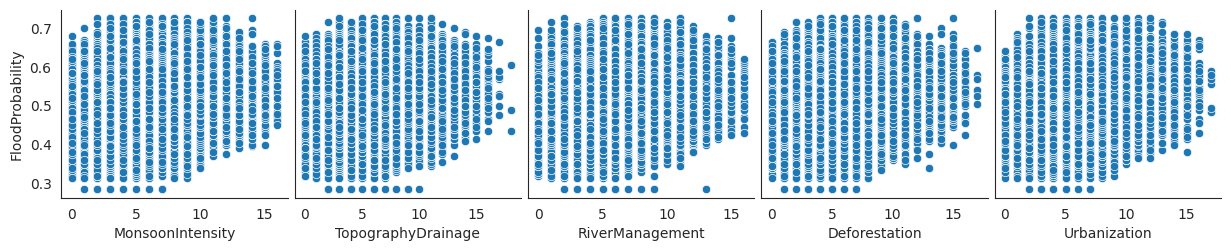

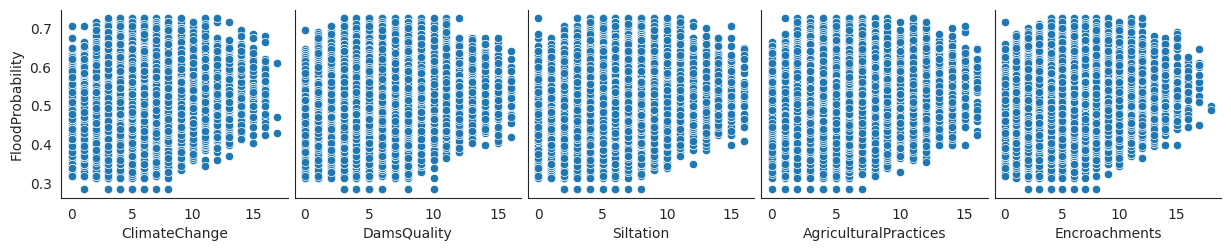

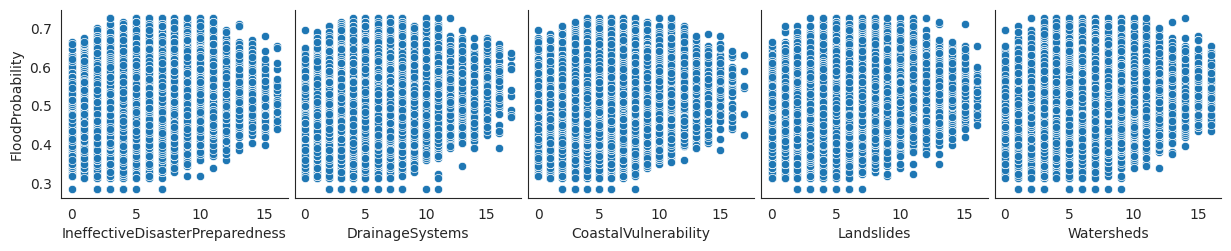

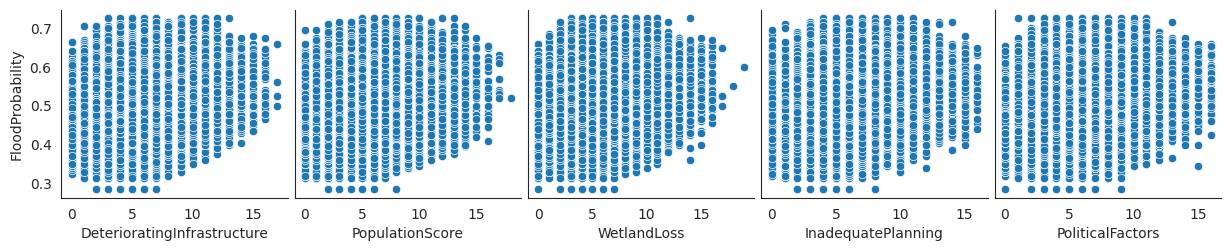

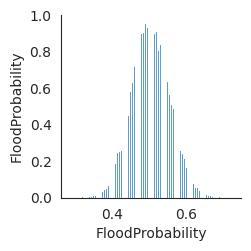

In [13]:
# Set Seaborn style
sns.set_style('white')
sns.color_palette('deep')

# Iterate over columns in steps of 5
for i in range(0, len(df.columns), 5):
    # Create pair plots for subsets of columns (5 at a time)
    pair_plot = sns.pairplot(data=df,
                             x_vars=df.columns[i:i+5],  # Select 5 columns
                             y_vars=['FloodProbability'])  # 'FloodProbability' as y-variable

Create a **distribution plot** (histogram) for the `FloodProbability` column in the DataFrame df using Seaborn's `displot` function.

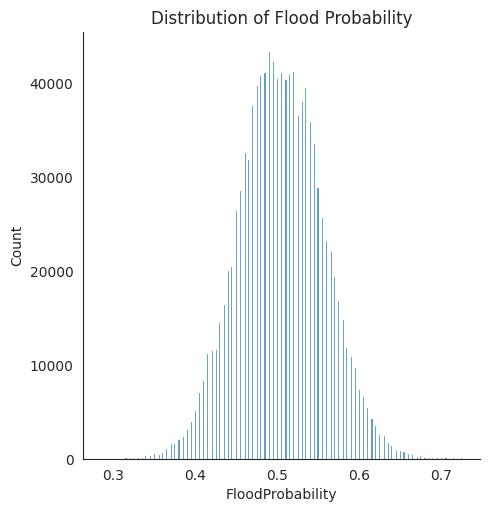

In [14]:
sns.displot(df['FloodProbability'])
plt.title('Distribution of Flood Probability')
plt.show()

As we noticed before, statistics are very similar across all columns, so let's visualize **distributions of two random columns** using `boxplot` and `displot` from seaborn.

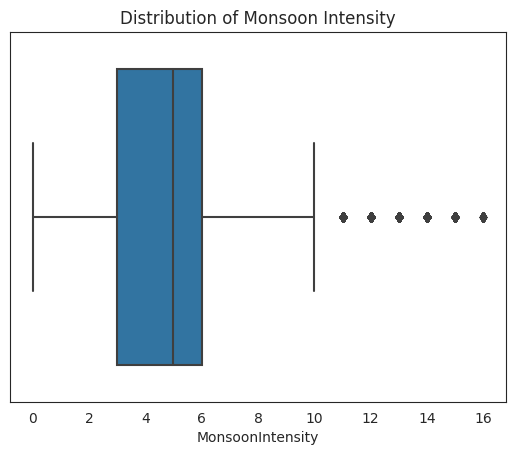

In [15]:
sns.boxplot(x = df['MonsoonIntensity'])
plt.title('Distribution of Monsoon Intensity')
plt.show()

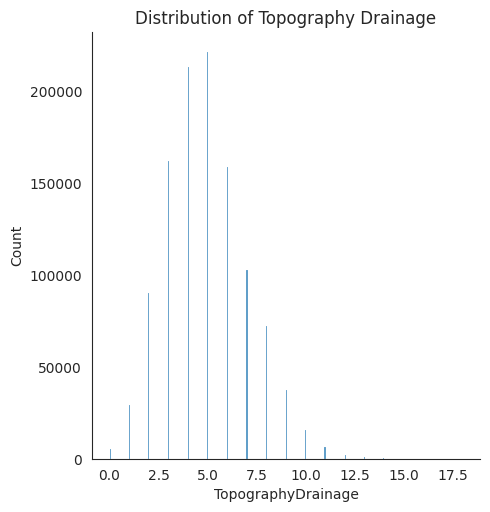

In [16]:
sns.displot(df['TopographyDrainage'])
plt.title('Distribution of Topography Drainage')
plt.show()

Finally, let's visualize **relationship** between these two columns using `scatterplot`.

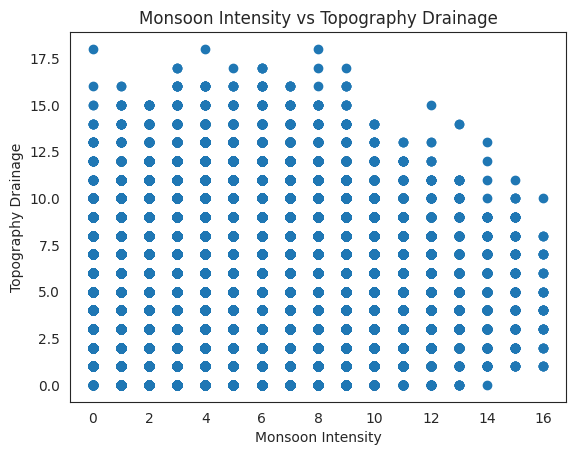

In [17]:
ax = plt.axes()

ax.scatter(df.MonsoonIntensity, df.TopographyDrainage)
    
# Label the axes
ax.set(xlabel='Monsoon Intensity',
      ylabel='Topography Drainage',
      title='Monsoon Intensity vs Topography Drainage');

### <font color='#0d363e'> Observations from visualizations above: <font>
- **Scatterplots** of all columns with `target column` are **sparse** and look **similar**, again due to the fact that this dataset is `synthetically-generated`. There is no visible linear relationship between variables, which violates `linearity assumption` (Linear regression needs the relationship between independent variable and the dependent variable to be linear).
- **Distribution** of `FloodProbability` is normal centered around 0.5.
- Visualization of **distribution** of feature columns reinforces findings from descriptive statistics: columns exhibit a **median value** of 5, with **few outliers**.
- The scatter plot illustrates that there's **no visible correlation** between the columns.

<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="prepr"></a>
<p style="background-color: #2c3e50; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 160%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    4. Feature Engineering and Data Preprocessing
</p>

<a id="sum"></a>
<p style="background-color: #435a70; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 160%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    4.1. Calculate Sum of the Features
</p>

By recommendation in the comments section, I will sum all the feature columns, creating one additional feature. For more details and explanation, you can check the notebook by AmbrosM [here](https://www.kaggle.com/code/ambrosm/pss4e5-eda-which-makes-sense#Advanced-models-with-feature-engineering).

In [18]:
# Select all columns except 'FloodProbability'
feature_cols = [x for x in df.columns if x != "FloodProbability"]

# Create a new column 'fsum' which is the sum of all feature columns for each row
df['fsum'] = df[feature_cols].sum(axis=1) 

<a id="sep"></a>
<p style="background-color: #435a70; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 160%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    4.2. Separate features and target
</p>

Set a **variable X** equal to the numerical features and a **variable y** equal to the "FloodProbability" column.

In [19]:
X = df.loc[:, df.columns != "FloodProbability"]
y = df['FloodProbability']

<a id="scale"></a>
<p style="background-color: #435a70; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 160%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    4.3. Feature Scaling
</p>

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

<a id="split"></a>
<p style="background-color: #435a70; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 160%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    4.4. Train / Test Split
</p>

Split the data into training and testing sets.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="ml"></a>
<p style="background-color: #2c3e50; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 160%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    5. Data Modeling
</p>

<a id="lr"></a>
<p style="background-color: #435a70; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 160%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    5.1. Baseline Model - Simple Linear Regression
</p>

In [22]:
# Create an instance of the class LinearRegression
lr = LinearRegression()

# Fit the instance on the data and then predict the expected value
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Evaluate the model
r2_score(lr_pred,y_test)

0.8161156960499342

In [23]:
# Create DataFrame to display results
r2_df = pd.DataFrame({'Model': ['Linear Regression'], 'R^2 Score': [r2_score(lr_pred,y_test)]}).set_index('Model')
r2_df

,R^2 Score
Model,
Linear Regression,0.816116


### <font color='#0d363e'>Plot predictions vs actual for linear regression model.<font>

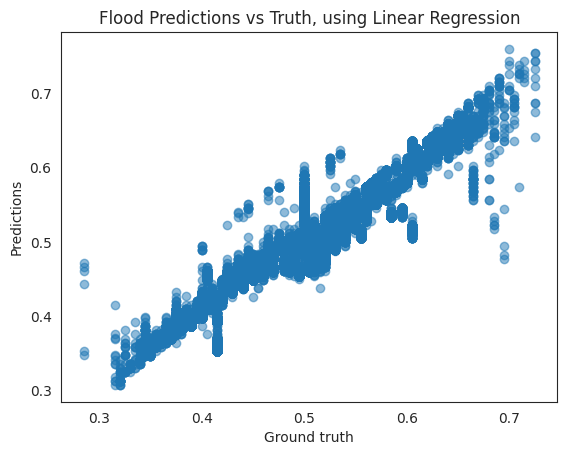

In [24]:
ax = plt.axes()
ax.scatter(y_test, lr_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Flood Predictions vs Truth, using Linear Regression');

<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="poly"></a>
<p style="background-color: #435a70; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 160%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    5.2. Polynomial Regression
</p>

What if our data is more complex than a straight line? We can use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called `Polynomial Regression`. Given the large size of our dataset, consisting of **over 11 million rows**, we'll limit our polynomial features to **degree 2**. This choice is strategic, as higher degrees would exponentially increase the number of dimensions (columns), making it computationally challenging to train the model. 

### Polynomial Features Degree 2<font>

In [25]:
# Define pipeline with Polynomial Regression degree = 2
polynomial = Pipeline([
    ('polynomial', PolynomialFeatures(include_bias=False, degree=2)),
    ('model', LinearRegression())
])

# Fit the instance on the data and then predict the expected value
polynomial.fit(X_train, y_train)
poly2_pred = polynomial.predict(X_test)

# Calculate R^2 score for the polynomial regression model with degree 2
r2_poly2 = r2_score(y_test, poly2_pred)

# Display R^2 score
print(r2_poly2)

0.8451315502731928


In [26]:
# Create DataFrame for the new score
new_row = pd.DataFrame({'Model': ['Polynomial Regression (Degree 2)'], 'R^2 Score': [r2_poly2]}).set_index('Model')

# Append the new score to the existing DataFrame
r2_df = pd.concat([r2_df, new_row])

# Display the updated DataFrame
r2_df

,R^2 Score
Model,
Linear Regression,0.816116
Polynomial Regression (Degree 2),0.845132


<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="sgd"></a>
<p style="background-color: #435a70; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 160%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    5.3. SGDRegressor
</p>

Let's explore Stochastic gradient descent. `Stochastic Gradient Descent (SGD)` is a popular optimization algorithm used in machine learning for training models, especially in **large-scale** and online learning scenarios. Unlike traditional gradient descent, which computes the gradient of the cost function using the entire dataset, SGD updates the model parameters based on a single or a small subset of training examples at each iteration. This makes it **computationally efficient** and suitable for large datasets.

In [27]:
# Initialize the SGDRegressor
sgd_regressor = SGDRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.001, 0.0001, 0.00005],
    'learning_rate': ['constant', 'optimal', 'adaptive'],
    'max_iter': [1000, 2000],
    'eta0': [1, 10, 100]
}
    
# Perform Grid Search Cross Validation to find the best hyperparameters    
grid = GridSearchCV(estimator=sgd_regressor, param_grid=param_grid, n_jobs=-1, cv=3)
grid.fit(X_train, y_train)

# Get the best model from Grid Search
sgd_model = grid.best_estimator_

# Fit the best model to the training data
sgd_model.fit(X_train, y_train)

# Make predictions
sgd_pred = sgd_model.predict(X_test)

# Evaluate the model
r2_sgd = r2_score(y_test, sgd_pred)
print("Best parameters found:", grid.best_params_)
print("Best R^2 score:", r2_sgd)

Best parameters found: {'alpha': 0.0001, 'eta0': 1, 'learning_rate': 'adaptive', 'max_iter': 1000, 'penalty': 'l2'}
Best R^2 score: 0.8446428696798451


In [28]:
# Create DataFrame for the new score
new_row = pd.DataFrame({'Model': ['SGDRegressor'], 'R^2 Score': [r2_sgd]}).set_index('Model')

# Append the new score to the existing DataFrame
r2_df = pd.concat([r2_df, new_row])

# Display the updated DataFrame
r2_df

,R^2 Score
Model,
Linear Regression,0.816116
Polynomial Regression (Degree 2),0.845132
SGDRegressor,0.844643


<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="xgb"></a>
<p style="background-color: #435a70; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 160%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    5.4. XGBoostRegressor
</p>

`XGBoostRegressor` is a regression model based on the `XGBoost (Extreme Gradient Boosting)` algorithm, which is an advanced implementation of gradient boosting machines. XGBoostRegressor is widely used in regression tasks due to its high performance, scalability, and flexibility.

In [29]:
import xgboost as xgb

# Initialize the XGBRegressor
xgb_model = xgb.XGBRegressor(n_estimators=50)

# Define hyperparameters to tune
param_grid = {
    'eta': [0.1, 0.35],
    'max_depth': [2, 4, 7],
    'min_child_weight': [2, 7, 12],
    'lambda': [1, 2, 3.25, 5, 10],
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Perform Grid Search Cross Validation to find the best hyperparameters
xgb_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)
xgb_search.fit(X_train, y_train)

# Evaluate the model
print("Best parameters found:", xgb_search.best_params_)
print("Best R^2 score:", xgb_search.best_score_)

Best parameters found: {'alpha': 0.01, 'eta': 0.1, 'lambda': 1, 'max_depth': 7, 'min_child_weight': 7}
Best R^2 score: 0.8671121360182035


In [30]:
# Tuning number of estimators

xgb_model = xgb.XGBRegressor(alpha=0.01, eta=0.1, reg_lambda=1, max_depth=7, min_child_weight=7)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150, 500]
}

# Perform Grid Search Cross Validation to find the best hyperparameters
xgb_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, verbose=2)
xgb_search.fit(X_train, y_train)

# Get the best model from Grid Search
xgb_regressor = xgb_search.best_estimator_

# Fit the best model to the training data
xgb_regressor.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_regressor.predict(X_test)

# Evaluate the model
r2_xgb = r2_score(y_test, xgb_pred)
print("Best parameters found:", xgb_search.best_params_)
print("Best R^2 score:", r2_xgb)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ....................................n_estimators=50; total time=   2.9s
[CV] END ....................................n_estimators=50; total time=   2.9s
[CV] END ....................................n_estimators=50; total time=   2.9s
[CV] END ...................................n_estimators=100; total time=   5.5s
[CV] END ...................................n_estimators=100; total time=   4.3s
[CV] END ...................................n_estimators=100; total time=   4.3s
[CV] END ...................................n_estimators=150; total time=   5.8s
[CV] END ...................................n_estimators=150; total time=   5.8s
[CV] END ...................................n_estimators=150; total time=   5.6s
[CV] END ...................................n_estimators=500; total time=  18.3s
[CV] END ...................................n_estimators=500; total time=  18.2s
[CV] END ...................................n_est

In [31]:
# Create DataFrame for the new score
new_row = pd.DataFrame({'Model': ['XGBRegressor'], 'R^2 Score': [r2_xgb]}).set_index('Model')

# Append the new score to the existing DataFrame
r2_df = pd.concat([r2_df, new_row])

# Display the updated DataFrame
r2_df

,R^2 Score
Model,
Linear Regression,0.816116
Polynomial Regression (Degree 2),0.845132
SGDRegressor,0.844643
XGBRegressor,0.867080


<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="ensemble"></a>
<p style="background-color: #435a70; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 160%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    5.5. Ensemble Models
</p>

`Ensemble methods` combine the predictions of multiple models to improve overall performance, robustness, and accuracy by reducing the risk of overfitting associated with individual models. 

The `StackingRegressor` is a type of ensemble method in which multiple regression models are trained and their predictions are used as input features for a final meta-model, enhancing predictive accuracy by leveraging the strengths of diverse algorithms.

In [32]:
estimators = [('Polynomial Regression', polynomial), 
                  ('SGDRegressor', sgd_model), ('XGBoostRegressor', xgb_regressor)]

In [33]:
from sklearn.ensemble import StackingRegressor

# Create an instance of a class
SC = StackingRegressor(estimators=estimators, final_estimator= LinearRegression())

# Fit the instance on the data and predict the expected value
SC = SC.fit(X_train, y_train)
ensemble_preds = SC.predict(X_test)                  

In [34]:
r2_score(y_test, ensemble_preds)

0.8670827065303923

<a href="#contents" style="font-size:12px;">Table of Contents &#x2B06;</a>

<a id="subm"></a>
<p style="background-color: #2c3e50; font-family: 'Arial', sans-serif; color: #ffffff; font-size: 160%; text-align: center; border-radius: 1300px 60px; padding: 20px; margin: 20px auto; max-width: 1400px; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);">
    6. Predictions and Submission
</p>

In [ ]:
# Read Test CSV file
df_test = pd.read_csv('test.csv')

# Extract 'id' column into test_ids
test_ids = df_test['id']

# Remove 'id' column from df_test
df_test.drop(columns=['id'], inplace=True)

# Create a new column 'fsum' which is the sum of all feature columns for each row
df_test['fsum'] = df_test.sum(axis=1) 

# Scale data
df_test = scaler.transform(df_test)

In [36]:
# Fit the best model on the whole training dataset

SC.fit(X, y)

StackingRegressor(estimators=[('Polynomial Regression',
                               Pipeline(steps=[('polynomial',
                                                PolynomialFeatures(include_bias=False)),
                                               ('model', LinearRegression())])),
                              ('SGDRegressor',
                               SGDRegressor(eta0=1, learning_rate='adaptive',
                                            random_state=42)),
                              ('XGBoostRegressor',
                               XGBRegressor(alpha=0.01, base_score=None,
                                            booster=None, callbacks=None,
                                            colsample_bylevel=None,
                                            cols...
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None, min_child_weight=7,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=150, n_jobs=None, ...))],
                  final_estimator=LinearRegression())

In [37]:
# The best model applied to test_df
predictions_test = SC.predict(df_test)

# result dataframe
result = pd.DataFrame({'id' : test_ids, 'FloodProbability' : predictions_test.flatten()}, 
                                columns=['id', 'FloodProbability'])

# print result
result

,id,FloodProbability
0,1117957,0.577208
1,1117958,0.450807
2,1117959,0.451120
3,1117960,0.471842
4,1117961,0.472052
...,...,...
745300,1863257,0.476164
745301,1863258,0.442583
745302,1863259,0.619581
745303,1863260,0.549015


In [ ]:
#result.to_csv('/kaggle/working/submission.csv', index=False)